# Hands-On NLP
## Class 1

<font color = orange>
member1: Zhe HUANG  
<br>
member2: Pierre QIU  
<br>
member3: Lanshi FU  
<font>

- Getting some data

- Understanding a text corpus

  - Unicode

  - Character distributions

- The notion of words

  - Word distributions

  - Types and tokens

  - Text complexity

In [93]:
import re # Regular Expression
import unicodedata # Unicode
from collections import Counter
from pathlib import Path # just like os.path

import matplotlib as mpl 
import matplotlib.pyplot as plt
import nltk # the most popular NLP package
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.tokenize import word_tokenize # deal with string
from tqdm.notebook import tqdm # process plot

In [95]:
tqdm.pandas()

nltk.download("punkt")

%config InlineBackend.figure_format="retina"  # For high DPI display

sns.set_style("darkgrid")
sns.set_context("notebook")

pd.set_option('display.precision', 2)

[nltk_data] Downloading package punkt to /Users/zhehuang/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [97]:
DATA = Path("data") # file/folder in current path

TEXT_P = DATA / "texts" # equal to './data./texts'

CORPORA = [
    "mythology",
    "woodworking",
    "robotics",
    "hsm",
    "health",
    "portuguese",
]

EPS = np.finfo(float).eps # we need a 'machine epsilon'----'very nearly but not quite zero'

In [98]:
TEXT_P.mkdir(exist_ok=True) # create a directory when in './data./texts' there are no directories

# Getting some data

- If you have already downloaded the preprocessed "texts" folder, skip this, if not uncomment

- If you don't know how to use *git*, *conda* or *pip* inside of the notebook, learn it *now*

In [52]:
# !git clone https://github.com/EleutherAI/stackexchange_dataset/
# # %cd stackexchange_dataset
# # %pwd
# # !pip install -r requirements.txt

# !conda create -n honlp python=3.9
# !conda activate honlp
# !conda config --env --add channels conda-forge\n\n
# !conda update --all
# !conda install ipykernel pandas seaborn nltk ipywidgets
# !conda install bs4 lxml py7zr tqdm jsonlines zstandard ujson requests wget
# !pip install lm-dataformat
# !pip check

In [53]:
# !python stackexchange_dataset/main.py --names \
#     mythology.stackexchange,woodworking.stackexchange,woodworking.stackexchange,
#     robotics.stackexchange,hsm.stackexchange,health.stackexchange,
#     portuguese.stackexchange

In [99]:
corpora = {}
stats = []

for corpus in tqdm(CORPORA):
    print(corpus)
    texts = []
    for fp in (TEXT_P / corpus).glob("*.txt"):
        with fp.open() as f:
            texts.append(f.read())

    corpora[corpus] = "".join(texts)

    stats.append(
        {
            "corpus": corpus,
            "files_n": len(texts),
            "chars_n": len(corpora[corpus]),
        }
    )

df = pd.DataFrame.from_records(stats, index=["corpus"])
df["text"] = [corpora[corpus] for corpus in corpora]
df

  0%|          | 0/6 [00:00<?, ?it/s]

mythology
woodworking
robotics
hsm
health
portuguese


,files_n,chars_n,text
corpus,,,
mythology,1428,4689305,Q:\n\nCan anyone identify what Chinese mytholo...
woodworking,2461,6729416,Q:\n\nGlue-up for butcher block-style countert...
robotics,2981,7254006,Q:\n\nHow is this torque value arrived?\n\nI'm...
hsm,2329,7364214,"Q:\n\nWhen and why did people stopped using ""n..."
health,3412,9148631,Q:\n\nHelp reading an eyeglass prescription: W...
portuguese,1840,4415251,"Q:\n\nQual a origem da expressão ""o fim da pic..."


In [100]:
for corpus, text in corpora.items():
    print(f"*** {corpus} ***")
    print(text[:65])

*** mythology ***
Q:

Can anyone identify what Chinese mythology creature this is?

*** woodworking ***
Q:

Glue-up for butcher block-style countertop

Background
I am w
*** robotics ***
Q:

How is this torque value arrived?

I'm going through this per
*** hsm ***
Q:

When and why did people stopped using "natural philosophy" te
*** health ***
Q:

Help reading an eyeglass prescription: What does "PL" or "PC"
*** portuguese ***
Q:

Qual a origem da expressão "o fim da picada"?

Se, em geral, 


# Visualizing the corpus

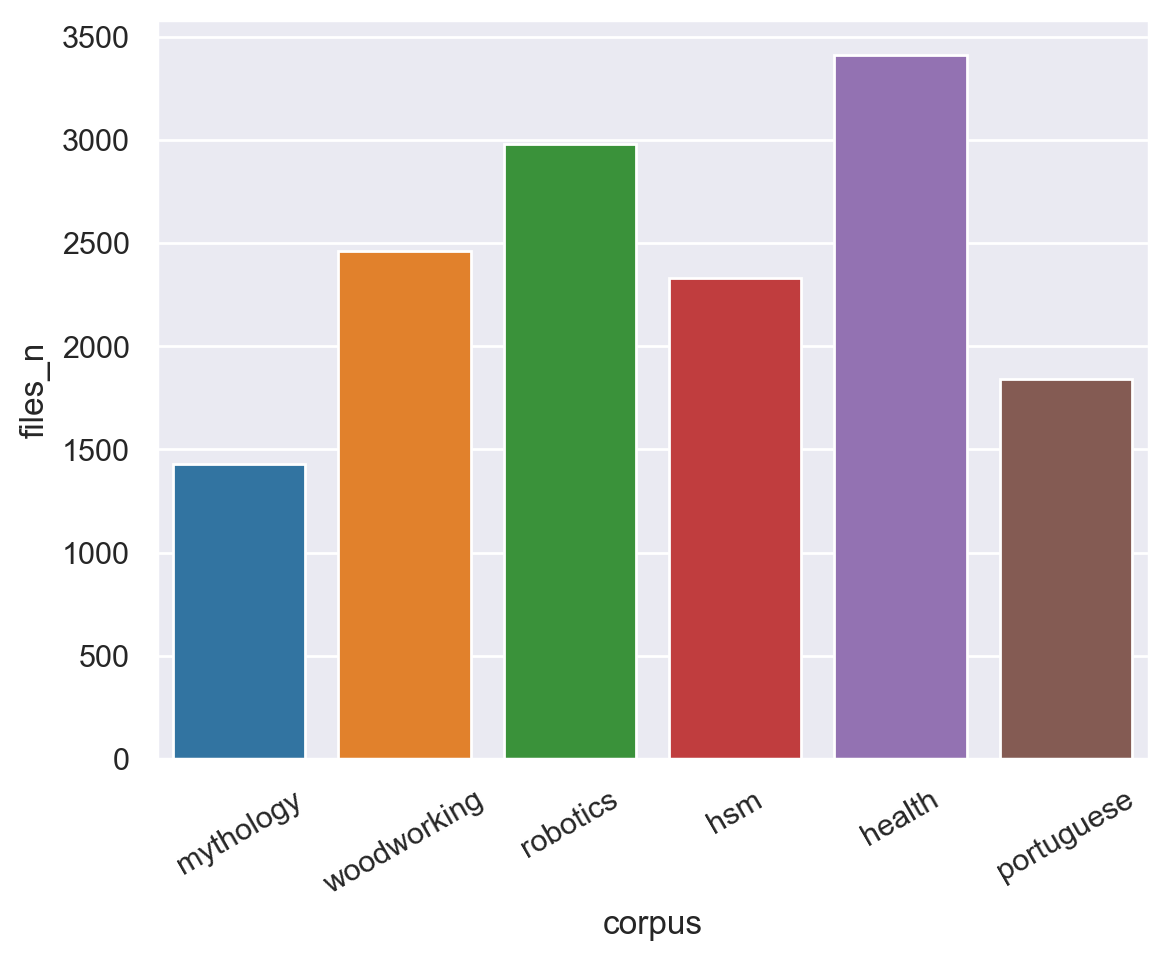

In [103]:
sns.barplot(x=df.index, y="files_n", data=df)
plt.xticks(rotation=30)
plt.show()

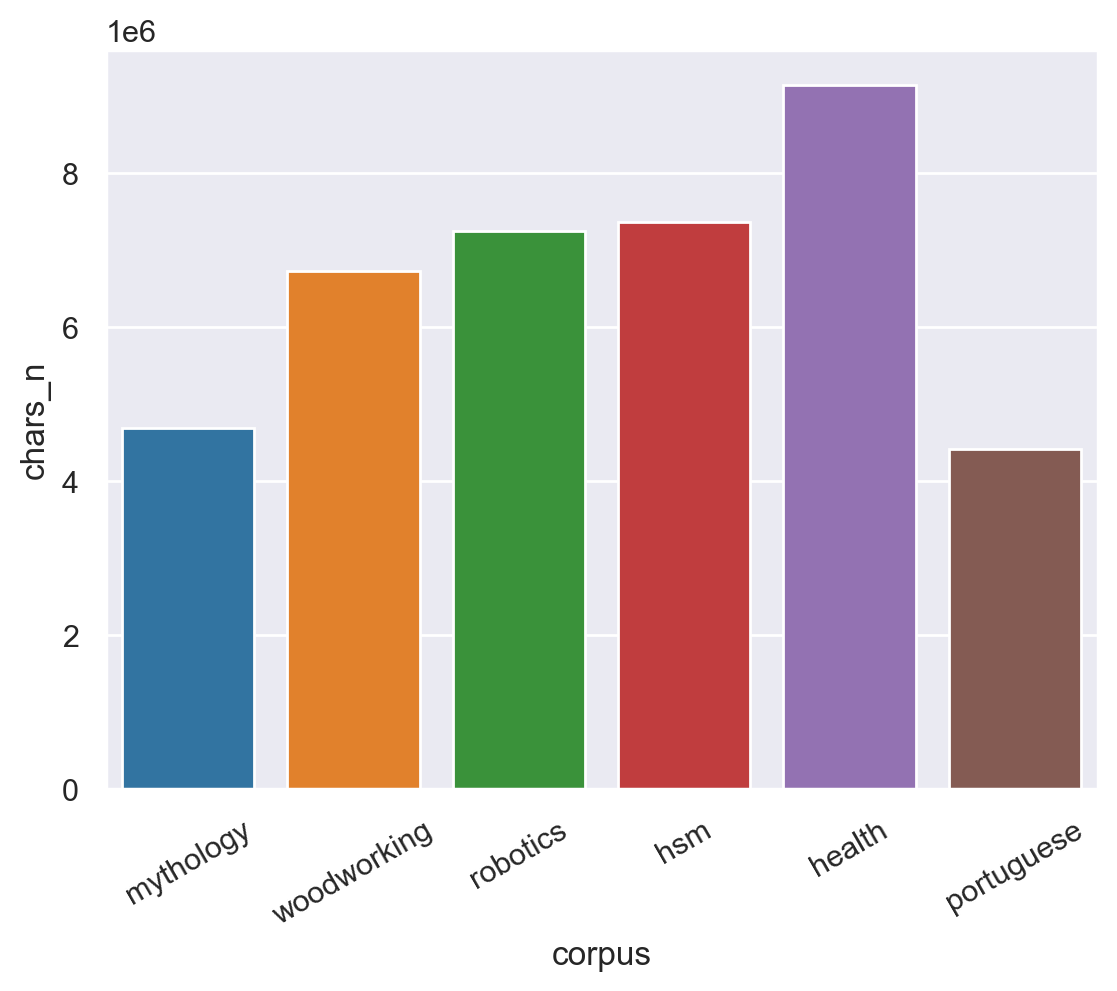

In [104]:
sns.barplot(x=df.index, y="chars_n", data=df)
plt.xticks(rotation=30)
plt.show()

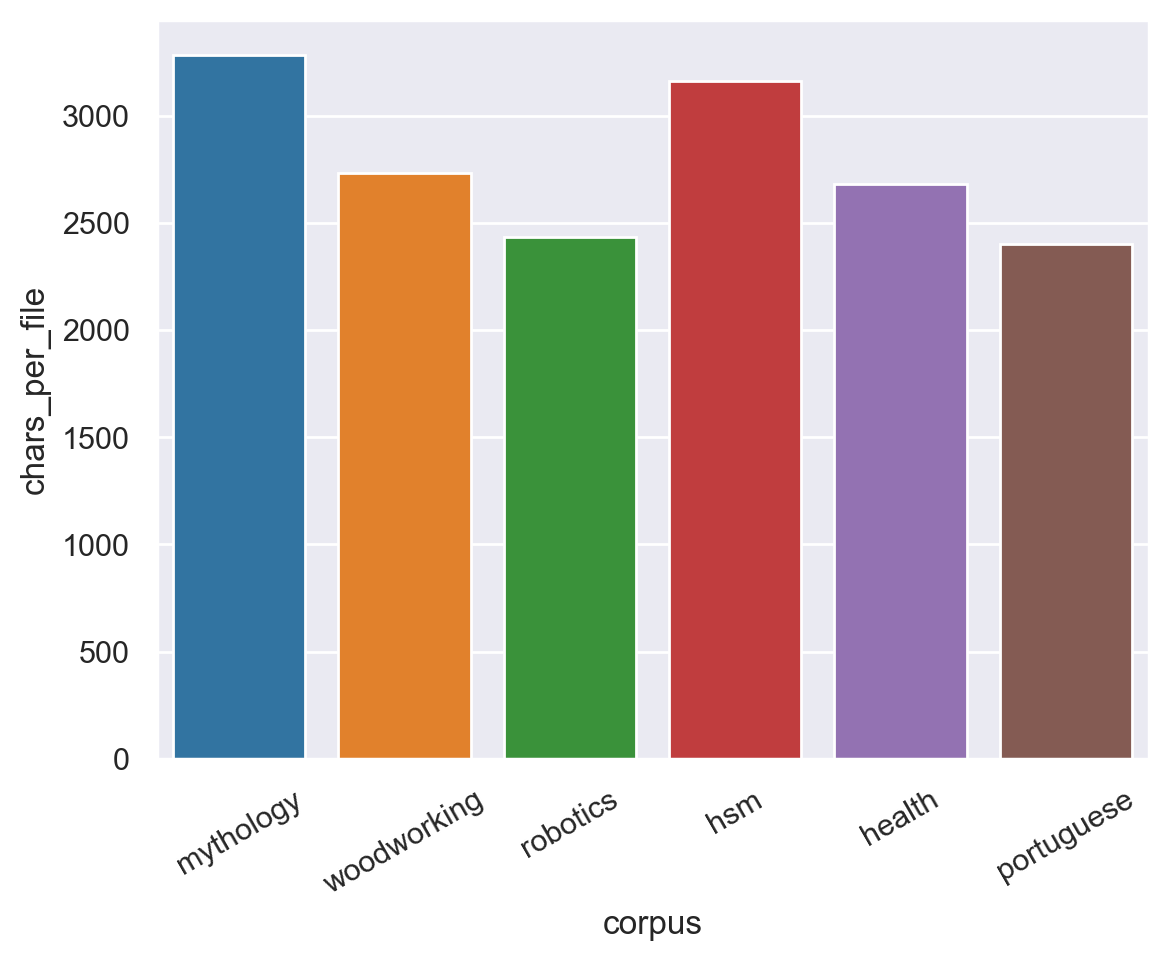

In [105]:
df["chars_per_file"] = df.chars_n / df.files_n
sns.barplot(x=df.index, y="chars_per_file", data=df)
plt.xticks(rotation=30)
plt.show()

In [106]:
char_counters = df.text.map(Counter)

print(char_counters.health)

Counter({' ': 1428190, 'e': 861733, 't': 632823, 'a': 565159, 'i': 546356, 'o': 544730, 'n': 497167, 's': 484696, 'r': 423945, 'h': 298661, 'l': 295594, 'c': 257405, 'd': 255072, 'u': 208547, 'm': 181309, 'f': 155592, 'p': 148135, 'y': 135782, 'g': 131592, 'b': 101865, '\n': 98068, 'w': 96347, '.': 83195, 'v': 80904, ',': 72317, 'k': 42048, 'I': 30666, '-': 25035, 'A': 23297, 'T': 22328, ':': 21092, '0': 20947, ')': 20097, '(': 19763, '1': 19457, 'x': 18488, 'S': 16075, '/': 15770, '2': 15348, 'C': 15331, "'": 14012, 'D': 12043, '?': 10573, 'H': 9790, 'M': 9623, 'P': 9573, '"': 9515, 'R': 8196, 'q': 7768, '3': 7653, '5': 7437, 'W': 7370, 'B': 7203, '9': 7147, 'O': 7116, 'E': 7058, 'N': 6760, 'F': 6620, 'z': 6278, 'j': 6113, '4': 5863, '6': 5305, '8': 4810, 'V': 4775, 'L': 4736, '7': 4692, 'Q': 3892, 'G': 3694, 'U': 3377, '%': 3032, ';': 2444, 'J': 2320, 'Y': 2267, 'K': 1731, ']': 1492, '[': 1490, '’': 1136, '–': 1121, '=': 1110, '_': 962, '&': 887, '“': 690, '”': 684, '!': 587, '+': 58

In [107]:
df["char_types_n"] = char_counters.map(len)
df

,files_n,chars_n,text,chars_per_file,char_types_n
corpus,,,,,
mythology,1428,4689305,Q:\n\nCan anyone identify what Chinese mytholo...,3283.83,1684
woodworking,2461,6729416,Q:\n\nGlue-up for butcher block-style countert...,2734.42,159
robotics,2981,7254006,Q:\n\nHow is this torque value arrived?\n\nI'm...,2433.41,189
hsm,2329,7364214,"Q:\n\nWhen and why did people stopped using ""n...",3161.96,524
health,3412,9148631,Q:\n\nHelp reading an eyeglass prescription: W...,2681.31,291
portuguese,1840,4415251,"Q:\n\nQual a origem da expressão ""o fim da pic...",2399.59,437


### notez:
- space 
  - '\u200c' '\u200e' '\u3000' '\xa0' ???
- ascii
- other letters
  - diacritics: ĕ Ł 
- other characters
  - other languages 茶 Ꝣ  ी が
  - symbols €
  - graphical symbols ■
  - emoji ✅ 🤗
- punctuation
  - , ! ≫ '\xad'


In [108]:
# new in 2021: ⃀ (Kyrgyzstani som)
#   (see also https://www.unicode.org/emoji/charts-14.0/emoji-released.html)

for ch in "ĕŁ茶Ꝣीが€,!≫■✅🤗\u200c":
    print(unicodedata.category(ch), ":::", unicodedata.name(ch))

Ll ::: LATIN SMALL LETTER E WITH BREVE
Lu ::: LATIN CAPITAL LETTER L WITH STROKE
Lo ::: CJK UNIFIED IDEOGRAPH-8336
Lu ::: LATIN CAPITAL LETTER VISIGOTHIC Z
Mc ::: DEVANAGARI VOWEL SIGN II
Lo ::: HIRAGANA LETTER GA
Sc ::: EURO SIGN
Po ::: COMMA
Po ::: EXCLAMATION MARK
Sm ::: MUCH GREATER-THAN
So ::: BLACK SQUARE
So ::: WHITE HEAVY CHECK MARK
So ::: HUGGING FACE
Cf ::: ZERO WIDTH NON-JOINER


In [113]:
myth_char_freq_df = pd.DataFrame.from_dict(
    char_counters.mythology, orient="index", columns=["freq"]
)
myth_char_freq_df.sort_values("freq", inplace=True, ascending=False)
myth_char_freq_df.index.name = "char"
myth_char_freq_df

,freq
char,
,783629
e,447804
t,312204
a,287794
o,273780
...,...
抱,1
還,1
Ø,1


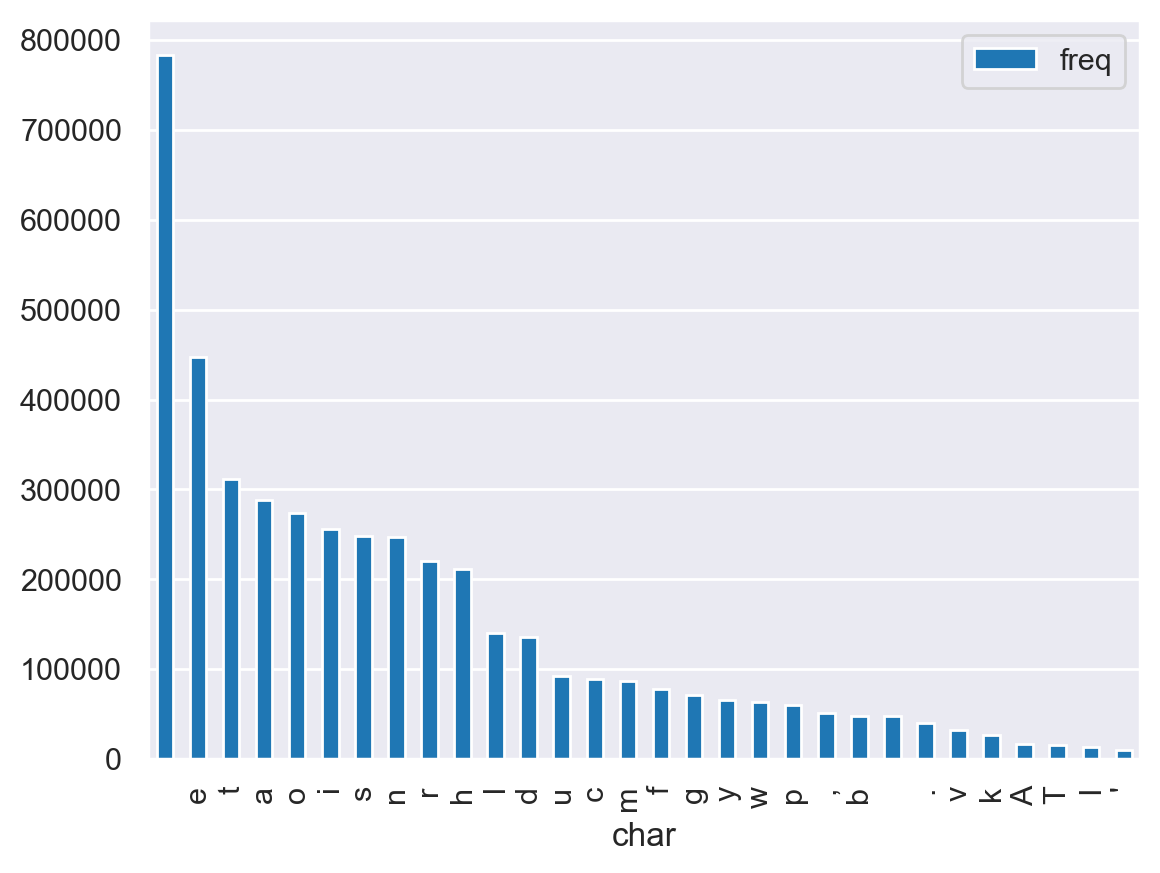

In [114]:
myth_char_freq_df.head(30).plot(kind="bar")
plt.grid(axis="x")
plt.show()

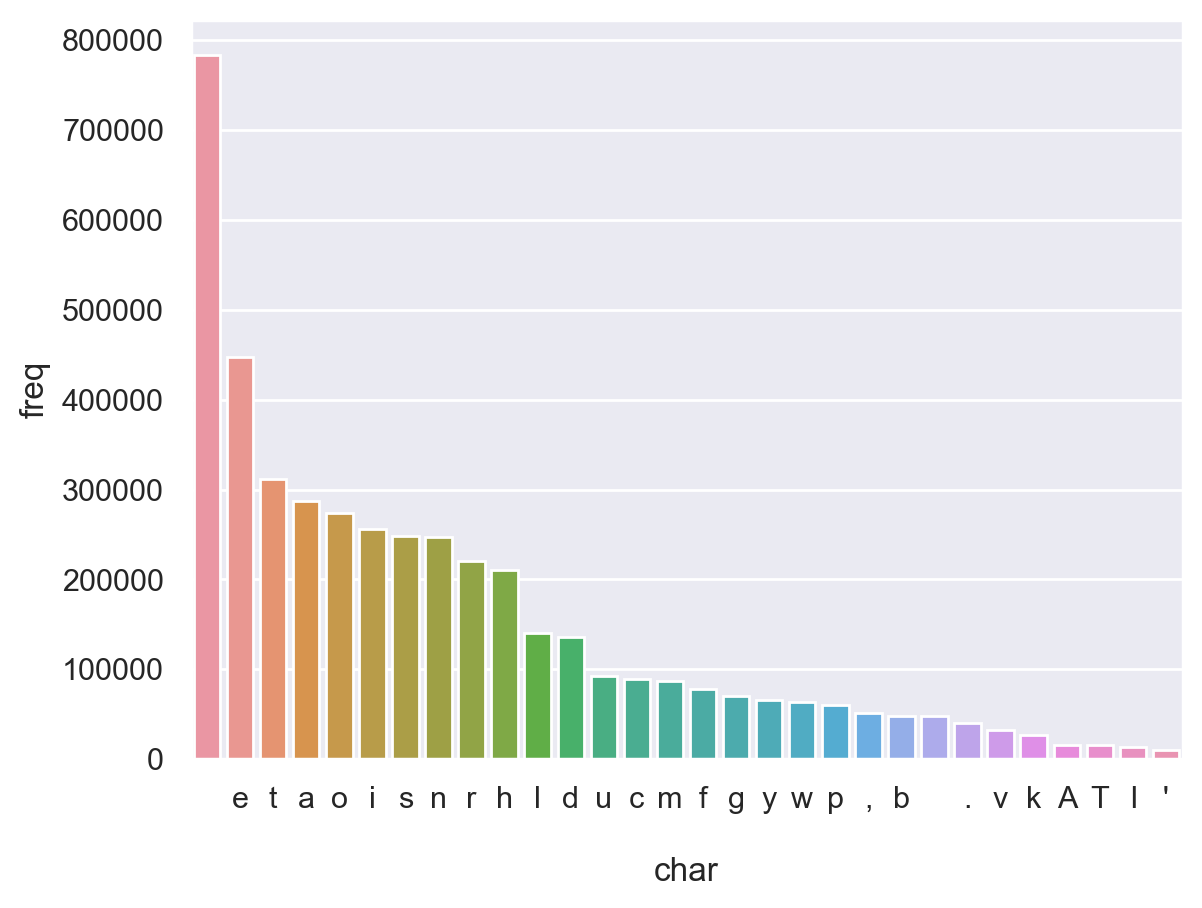

In [115]:
sns.barplot(
    x=myth_char_freq_df.head(30).index,
    y="freq",
    data=myth_char_freq_df.head(30),
)
plt.show()

/Users/zhehuang/opt/anaconda3/envs/HoNLP/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


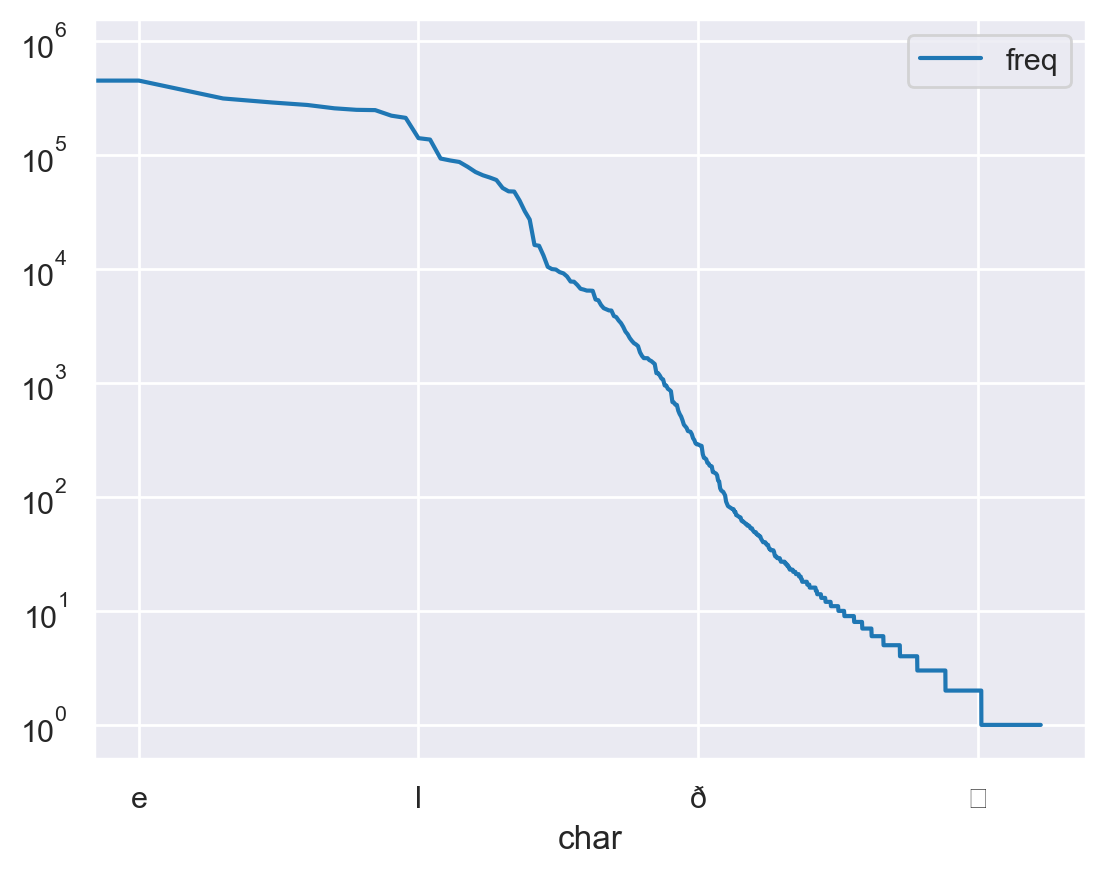

In [116]:
myth_char_freq_df.plot(loglog=True)
plt.show()

In [117]:
df

,files_n,chars_n,text,chars_per_file,char_types_n
corpus,,,,,
mythology,1428,4689305,Q:\n\nCan anyone identify what Chinese mytholo...,3283.83,1684
woodworking,2461,6729416,Q:\n\nGlue-up for butcher block-style countert...,2734.42,159
robotics,2981,7254006,Q:\n\nHow is this torque value arrived?\n\nI'm...,2433.41,189
hsm,2329,7364214,"Q:\n\nWhen and why did people stopped using ""n...",3161.96,524
health,3412,9148631,Q:\n\nHelp reading an eyeglass prescription: W...,2681.31,291
portuguese,1840,4415251,"Q:\n\nQual a origem da expressão ""o fim da pic...",2399.59,437


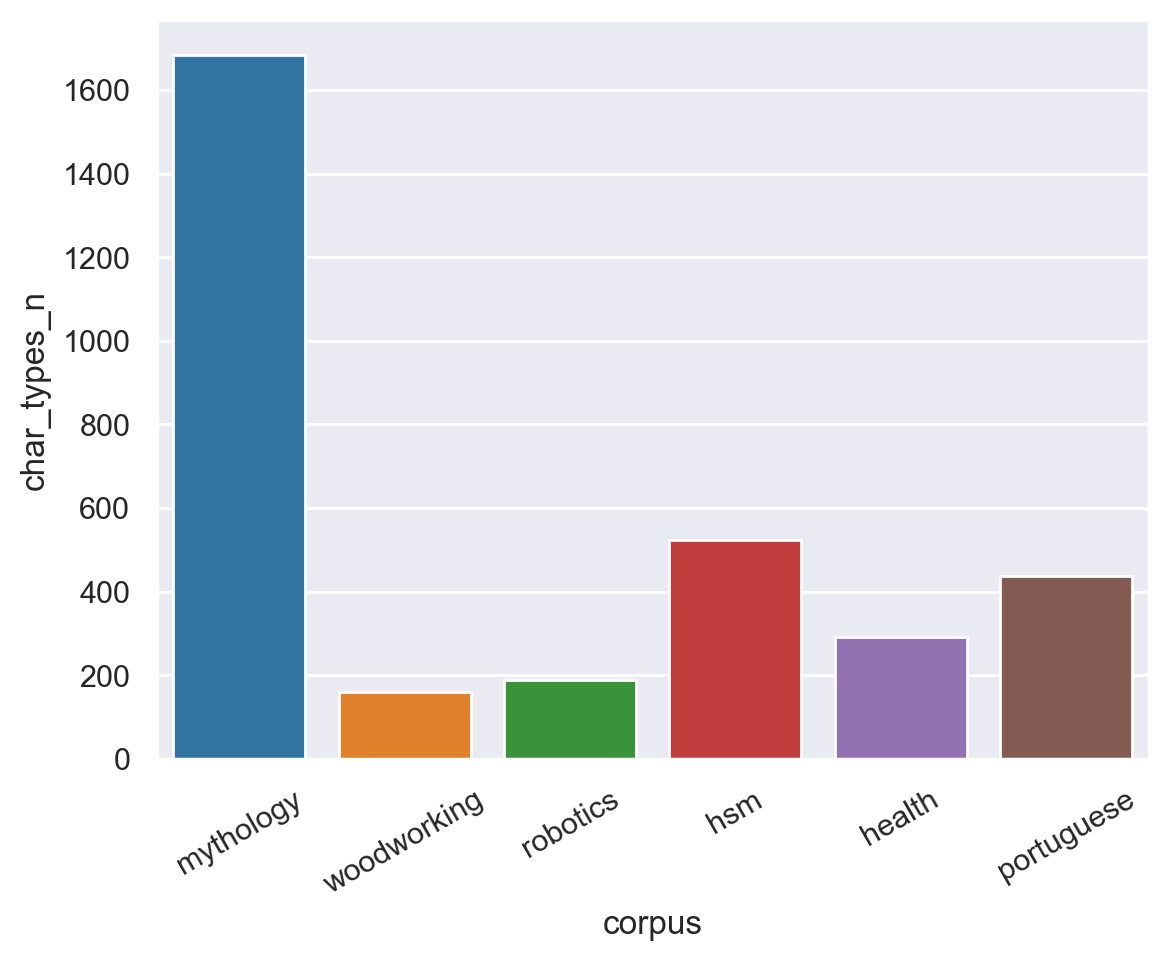

In [118]:
sns.barplot(x=df.index, y="char_types_n", data=df)
plt.xticks(rotation=30)
plt.show()

#### how to compute richness in characters?

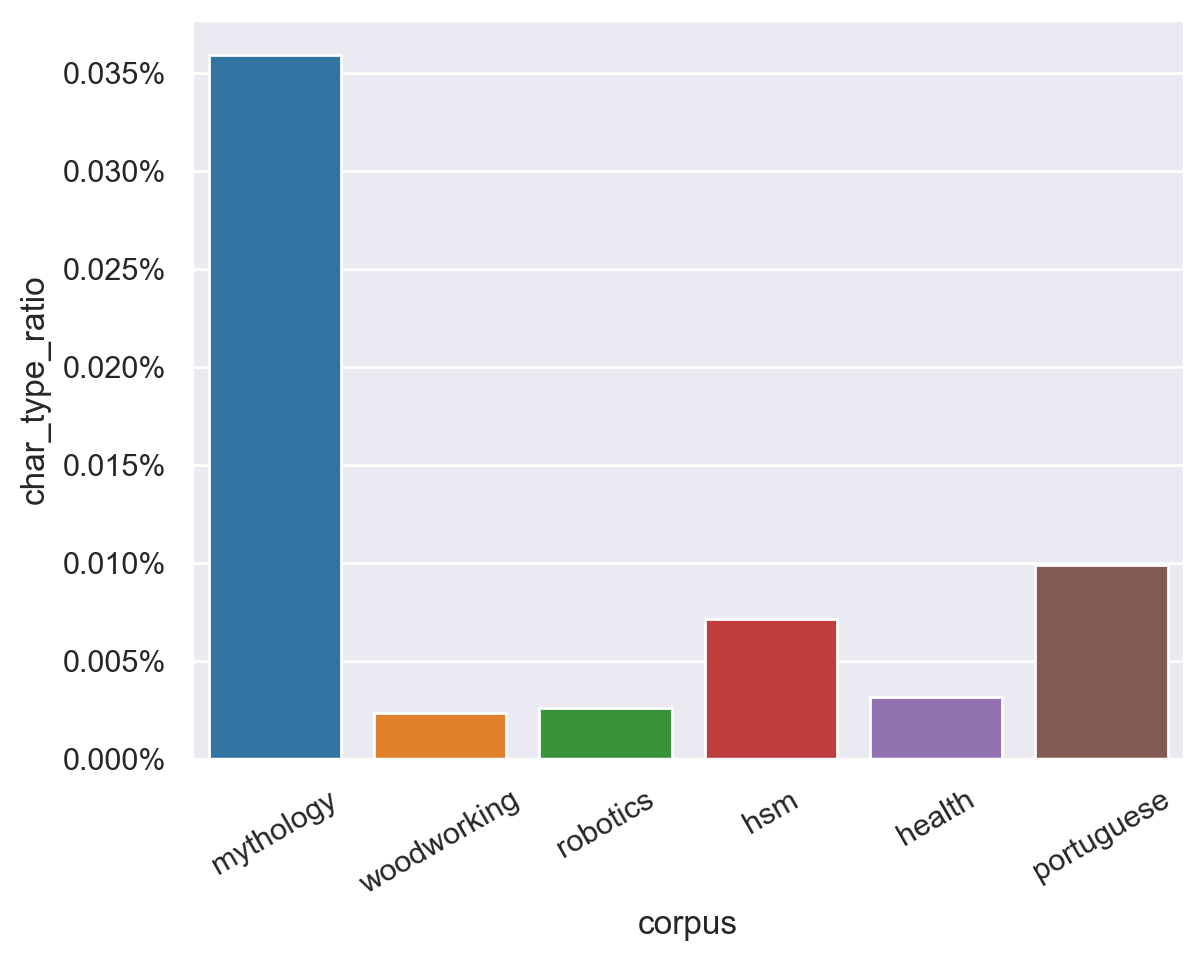

In [126]:
df["char_type_ratio"] = df.char_types_n / df.chars_n # this can represents richness in characters
ax = sns.barplot(x=df.index, y="char_type_ratio", data=df)
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1, decimals=3)) # convert decimals to percentage numbers
plt.xticks(rotation=30)
plt.show()

In [130]:
char_counters = df.text.map(lambda x: Counter(x[:1000])) # char_counters of first 1000 characters for each corpus
print(char_counters.health)
df["type_chars_1000"] = char_counters.map(len)

Counter({' ': 151, 'e': 80, 'i': 67, 't': 66, 'o': 64, 'a': 57, 'n': 54, 's': 49, 'r': 48, 'l': 33, 'h': 29, 'c': 27, 'f': 23, '\n': 22, 'd': 22, 'g': 21, 'y': 18, 'u': 17, 'p': 13, 'm': 13, 'b': 10, '.': 9, 'w': 8, ':': 6, '9': 6, 'P': 5, 'S': 5, 'v': 5, ',': 5, '"': 4, '(': 4, ')': 4, 'T': 4, '0': 4, '1': 4, 'W': 3, 'L': 3, 'I': 3, 'A': 3, '-': 3, 'k': 3, '7': 3, 'Q': 2, 'H': 2, 'C': 2, '?': 2, "'": 2, 'R': 2, 'E': 2, 'O': 1, 'Y': 1, 'M': 1, '“': 1, '‘': 1, '’': 1, '”': 1, 'B': 1})


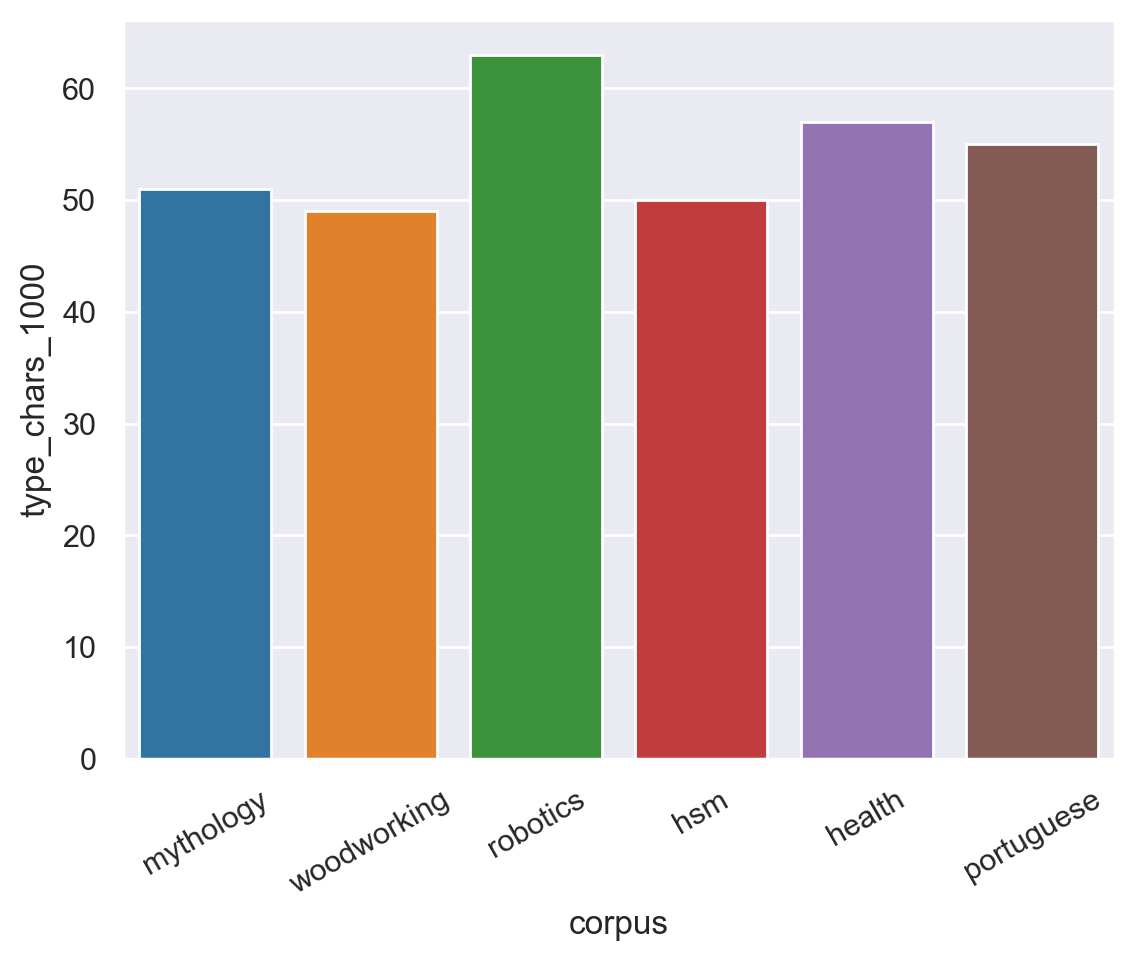

In [131]:
sns.barplot(x=df.index, y="type_chars_1000", data=df)
plt.xticks(rotation=30)
plt.show()

### What's going on here? Which text is the richest in characters?

In [135]:
HOP = 100_000

In [136]:
df

,files_n,chars_n,text,chars_per_file,char_types_n,char_type_ratio,type_chars_1000
corpus,,,,,,,
mythology,1428,4689305,Q:\n\nCan anyone identify what Chinese mytholo...,3283.83,1684,3.59e-04,51
woodworking,2461,6729416,Q:\n\nGlue-up for butcher block-style countert...,2734.42,159,2.36e-05,49
robotics,2981,7254006,Q:\n\nHow is this torque value arrived?\n\nI'm...,2433.41,189,2.61e-05,63
hsm,2329,7364214,"Q:\n\nWhen and why did people stopped using ""n...",3161.96,524,7.12e-05,50
health,3412,9148631,Q:\n\nHelp reading an eyeglass prescription: W...,2681.31,291,3.18e-05,57
portuguese,1840,4415251,"Q:\n\nQual a origem da expressão ""o fim da pic...",2399.59,437,9.90e-05,55


In [162]:
def batch_counts(text, max_len, hop): # one single batch's length is hop
    counters = [Counter()]
    for i in range(hop, max_len, hop):
        counters.append(counters[-1] + Counter(text[i - hop : i])) # like a ladder
    return [len(counter) for counter in counters]

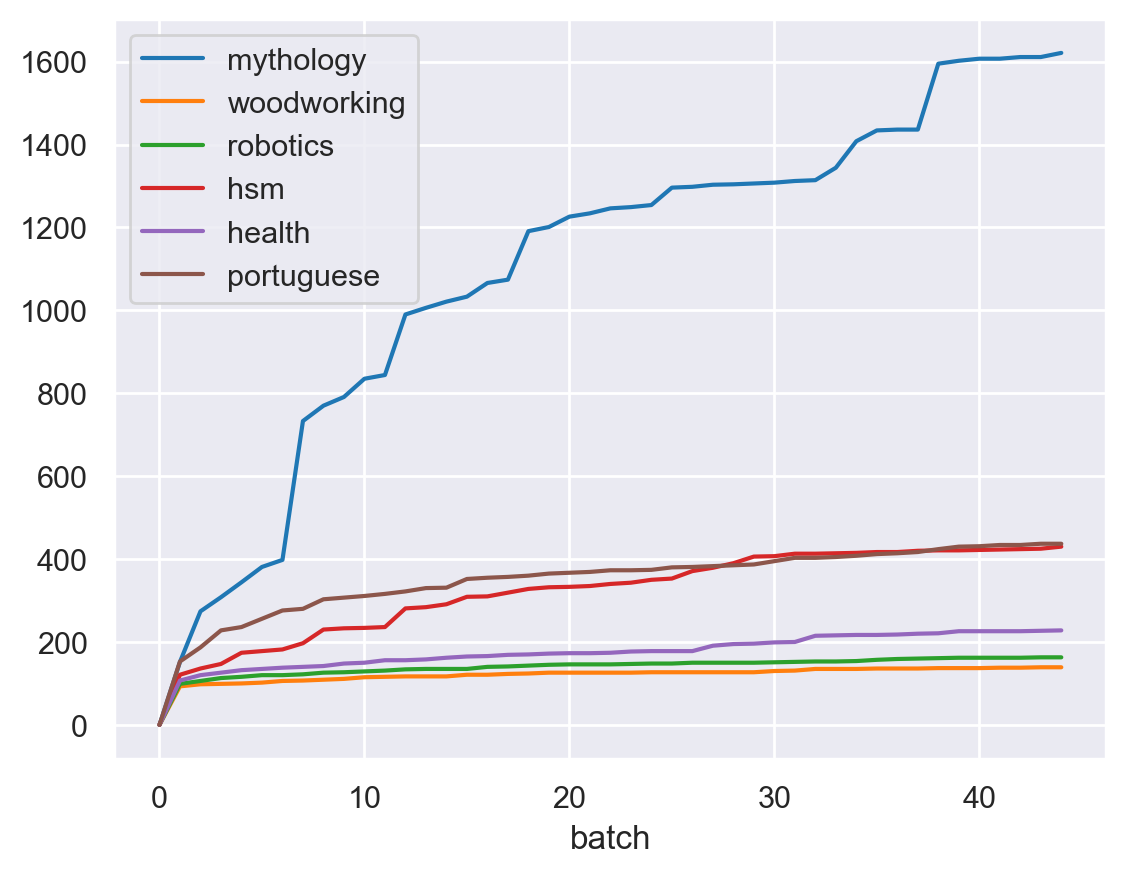

In [163]:
batch_counters = df.text.map(
    lambda x: batch_counts(x, max_len=df.chars_n.min(), hop=HOP)
)

batch_counters_df = pd.DataFrame(
    dict(zip(batch_counters.index, batch_counters.values))
)
batch_counters_df.index.name = "batch"

batch_counters_df.plot()
plt.show()

In [164]:
batch_counters_df.head()

,mythology,woodworking,robotics,hsm,health,portuguese
batch,,,,,,
0,0,0,0,0,0,0
1,152,93,99,121,107,153
2,274,98,106,136,120,187
3,308,99,113,147,126,228
4,344,100,116,174,132,236


### What's happening here?
#### 🚧 TODO: Give some explanation

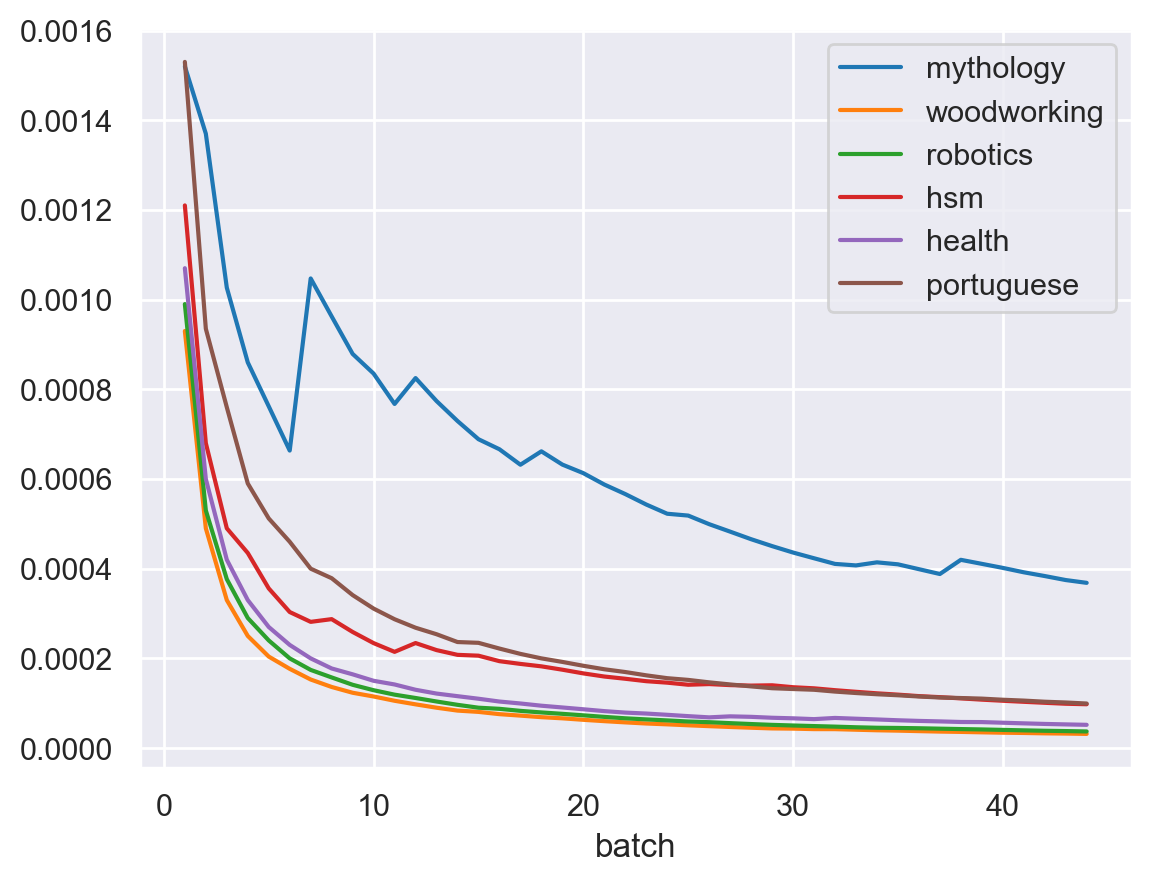

In [165]:
batches = np.arange(0, df.chars_n.min(), HOP)
# print('batches:\n', batches)
# print('batch_counters_df\n', batch_counters_df)
batch_counters_freq_df = batch_counters_df.divide(batches, axis="index")
batch_counters_freq_df.plot()
plt.show()

<font color=Green>
Firstly, we should know that these plots represent the frequency of batch counters for each corpus.

But as everybody know, the characters we use in a language are lmited.
That's why when the batch numbers augments, the frequency of batch counters will decrease. 
<font>

# Tokens and words

### tokenizing

In [169]:
text = "Let's all together defeat last years' problem, SARS-CoV-2, in 2023!"
token_splits = text.split()
# print(token_splits)
print("|".join(token_splits))
len(token_splits)

Let's|all|together|defeat|last|years'|problem,|SARS-CoV-2,|in|2023!


10

In [170]:
chars_re = re.compile(r"\W+")
token_splits = chars_re.split(text)

print("|".join(token_splits))
len(token_splits)

Let|s|all|together|defeat|last|years|problem|SARS|CoV|2|in|2023|


14

In [172]:
char_or_hyphen_re = re.compile(r"[\w-]+")
token_splits = char_or_hyphen_re.findall(text)

print("|".join(token_splits))
len(token_splits)

Let|s|all|together|defeat|last|years|problem|SARS-CoV-2|in|2023


11

Idiosyncratic rules for English!

- Think of *viens-tu*, *où va-text-il*, *Kaffeetasse*, *cantolo*, *我爱你*, ...

- Can you think of other cases in your language where the tokenizer does not work? What does the tokenizer do?

### Using a specialized class: `nltk`

In [173]:
nltk_tokens = word_tokenize(text)

print("|".join(nltk_tokens))
len(nltk_tokens)

Let|'s|all|together|defeat|last|years|'|problem|,|SARS-CoV-2|,|in|2023|!


15

### Not bad. Does it work for Portuguese?

In [174]:
pt_tokens = word_tokenize(corpora["portuguese"][:333])

print("|".join(pt_tokens))
len(pt_tokens)

Q|:|Qual|a|origem|da|expressão|``|o|fim|da|picada|''|?|Se|,|em|geral|,|``|picada|''|é|uma|coisa|negativa|,|pois|remete|a|dor|e|coceira|,|como|pode|ser|que|``|o|fim|da|picada|''|seja|uma|expressão|também|negativa|?|A|:|Picada|(|Aulete|,|3|)|é|também|“|caminho|aberto|em|mata|fechada|a|golpes|de|facão|ou|foice|”|.|E|a|minha|interpretação|foi|sempre|que|o|f


83

Watch out: do = de + o

**And it's slow!**

In [175]:
toks = [
    word_tokenize(text[:1_000_000]) for corpus, text in tqdm(corpora.items())
]

  0%|          | 0/6 [00:00<?, ?it/s]

So be patient for this line:

In [178]:
tokens_fp = DATA / "tokens.pkl"
try:
    tokens = pd.read_pickle(tokens_fp)
except FileNotFoundError:
    tokens = df.text.progress_map(word_tokenize)
    tokens.to_pickle(tokens_fp)

  0%|          | 0/6 [00:00<?, ?it/s]

In [182]:
df["tokens"] = tokens
df["tokens_n"] = df.tokens.map(len)
df["nr_types"] = df.tokens.map(set).map(len)
df

,files_n,chars_n,text,chars_per_file,char_types_n,char_type_ratio,type_chars_1000,tokens,tokens_n,nr_types
corpus,,,,,,,,,,
mythology,1428,4689305,Q:\n\nCan anyone identify what Chinese mytholo...,3283.83,1684,3.59e-04,51,"[Q, :, Can, anyone, identify, what, Chinese, m...",942611,51243
woodworking,2461,6729416,Q:\n\nGlue-up for butcher block-style countert...,2734.42,159,2.36e-05,49,"[Q, :, Glue-up, for, butcher, block-style, cou...",1390534,32316
robotics,2981,7254006,Q:\n\nHow is this torque value arrived?\n\nI'm...,2433.41,189,2.61e-05,63,"[Q, :, How, is, this, torque, value, arrived, ...",1526918,53823
hsm,2329,7364214,"Q:\n\nWhen and why did people stopped using ""n...",3161.96,524,7.12e-05,50,"[Q, :, When, and, why, did, people, stopped, u...",1445136,62465
health,3412,9148631,Q:\n\nHelp reading an eyeglass prescription: W...,2681.31,291,3.18e-05,57,"[Q, :, Help, reading, an, eyeglass, prescripti...",1714930,66007
portuguese,1840,4415251,"Q:\n\nQual a origem da expressão ""o fim da pic...",2399.59,437,9.90e-05,55,"[Q, :, Qual, a, origem, da, expressão, ``, o, ...",907253,60276


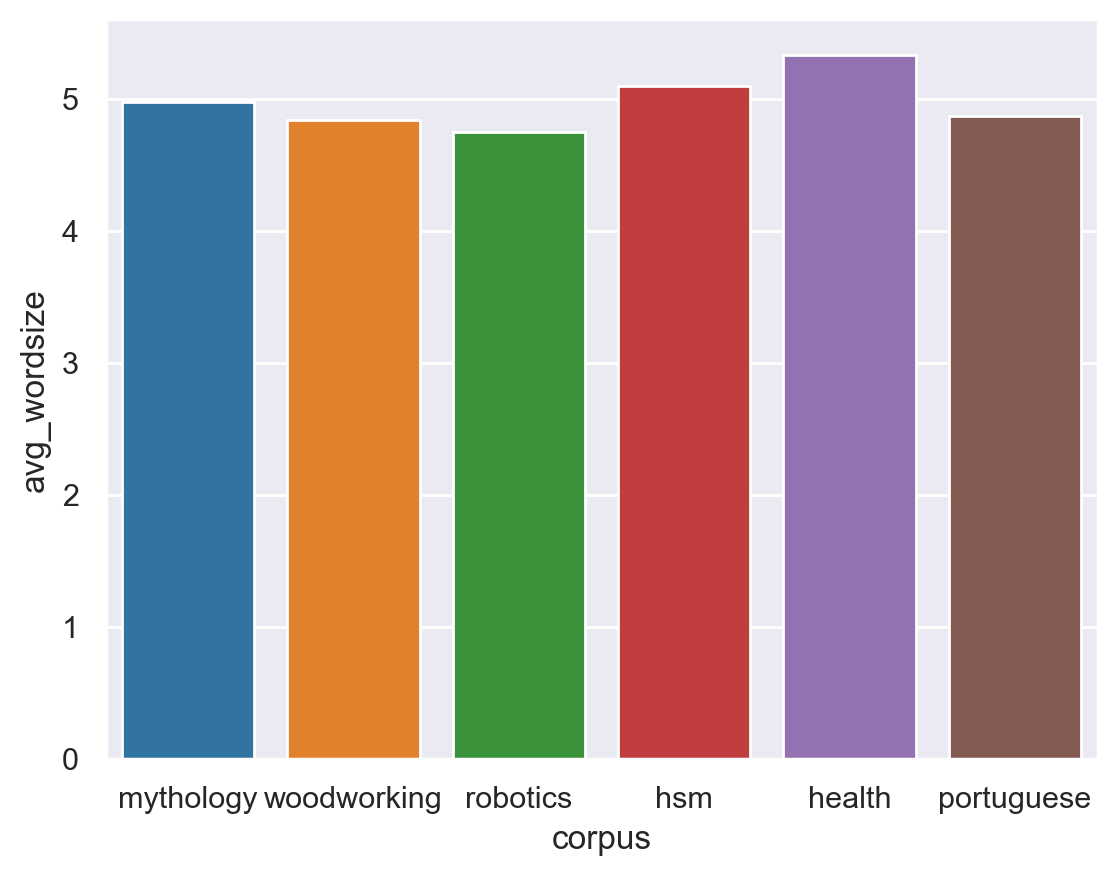

In [184]:
df["avg_wordsize"] = df.chars_n / df.tokens_n # average wordsize equals to proportion of char numbers and word numbers
sns.barplot(x=df.index, y="avg_wordsize", data=df)
plt.show()

In [185]:
word_ctr = Counter(df.tokens.mythology)
mytho_tok_freq_df = pd.DataFrame.from_dict(
    word_ctr, orient="index", columns=["freq"]
)
mytho_tok_freq_df.sort_values("freq", inplace=True, ascending=False)
mytho_tok_freq_df.index.name = "token"
mytho_tok_freq_df.head()

,freq
token,
the,51133
",",51118
.,33184
of,29559
and,21018


In [186]:
word_ctr = Counter(df.tokens.woodworking)
wood_tok_freq_df = pd.DataFrame.from_dict(
    word_ctr, orient="index", columns=["freq"]
)
wood_tok_freq_df.sort_values("freq", inplace=True, ascending=False)
wood_tok_freq_df.index.name = "token"
wood_tok_freq_df.head()

,freq
token,
the,65222
.,52199
",",41321
to,38592
a,37003


### Frequency of word length

#### 🚧 TODO

- Give the average length of tokens per corpus - clearly define what average you measure!

- Give the longest word per corpus and give their length

In [188]:
def avg_len_tokens(tokens):
    """
        param: tokens: list of tokens
        return: char length of all tokens / number of tokens
    """
    return len("".join(tokens))/len(tokens)


def max_len_tokens(tokens):
    """
        param: tokens: list of tokens
        return: maximum of length of tokens
    """
    return len(max(tokens,key=len))


def longest_words(tokens):
    """
        param: tokens: list of tokens
        return: longest tokens
    """
    return max(tokens, key=len)

In [191]:
print("\n*** average length in the dictionary (on types) ***")
display(tokens.map(avg_len_tokens))


*** average length in the dictionary (on types) ***


corpus
mythology      4.10
woodworking    3.94
robotics       3.89
hsm            4.26
health         4.45
portuguese     4.04
Name: text, dtype: float64

In [192]:
print("\n*** the longest words' length ***")
display(tokens.map(max_len_tokens))


*** the longest words' length ***


corpus
mythology      305
woodworking    137
robotics       199
hsm            178
health         265
portuguese     125
Name: text, dtype: int64

In [201]:
print("\n*** the longest words ***")
display(tokens.map(longest_words))


*** the longest words ***


corpus
mythology      亮乃北行見備，備與亮非舊，又以其年少，以諸生意待之。坐集既畢，眾賓皆去，而亮獨留，備亦不問其...
woodworking    //www.hafele.com/us/en/products/furniture-kitc...
robotics       //helgewurdemann.files.wordpress.com/2014/10/e...
hsm            //www.quora.com/What-are-the-ways-to-understan...
health         //www.researchgate.net/profile/Secil_Vural/pub...
portuguese     //educacao.uol.com.br/disciplinas/cultura-bras...
Name: text, dtype: object

#### We can try to remove all non-ascii characters to get to actual long words

In [194]:
wood_tok_freq_df["len"] = wood_tok_freq_df.index.str.len()
wood_tok_filtered_df = wood_tok_freq_df[
    ~wood_tok_freq_df.index.str.contains(r"[0-9/=+\._-]")
]
wood_tok_filtered_df.sort_values(by="len", ascending=False).head(10)

,freq,len
token,,
halfdovetaillapjoints,1,21
GraphussupportsMonica,1,21
CrazyRussianWoodShop,1,20
AloysiusDefenestrate,1,20
curiouslysatisfying,1,19
CanadianWoodworking,1,19
PopularWoodworking,1,18
oversimplification,3,18
GreatPlanesTrading,1,18


- Yay! we found "disproportionately"!

#### 🚧 TODO: Let's process all corpora to get their word length distribution

In [251]:
def len_word(tokens):
    return [len(token) for token in tokens]

def len_freq_counter(text):
    tokens = text.progress_map(word_tokenize)
    return tokens.map(len_word).map(Counter)

def len_freq_counter_tokens(tokens):
    return tokens.map(len_word).map(Counter)


len_freq = len_freq_counter_tokens(tokens)
len_freq

corpus
mythology      {1: 153321, 3: 166899, 6: 67225, 8: 40900, 4: ...
woodworking    {1: 212946, 7: 78883, 3: 256457, 11: 11000, 10...
robotics       {1: 392540, 3: 235938, 2: 218486, 4: 189722, 6...
hsm            {1: 272686, 4: 173547, 3: 219500, 6: 92865, 7:...
health         {1: 288044, 4: 236944, 7: 116946, 2: 268595, 8...
portuguese     {1: 232338, 4: 81767, 6: 67959, 2: 146408, 9: ...
Name: text, dtype: object

In [252]:
for i,corpus in enumerate(CORPORA):
    if i==0:
        len_freq_df = pd.DataFrame.from_dict(
            len_freq[corpus], orient="index", columns=[corpus]
        ).sort_index()
    else:
        len_freq_df[corpus] = pd.DataFrame.from_dict(
            len_freq[corpus], orient="index", columns=[corpus]
        ).sort_index()

len_freq_df

,mythology,woodworking,robotics,hsm,health,portuguese
1,153321,212946.0,392540.0,272686.0,288044.0,232338.0
2,153910,228789.0,218486.0,246598.0,268595.0,146408.0
3,166899,256457.0,235938.0,219500.0,256820.0,110382.0
4,134176,240247.0,189722.0,173547.0,236944.0,81767.0
5,94336,147693.0,130512.0,119923.0,153374.0,80599.0
...,...,...,...,...,...,...
148,1,NaN,NaN,NaN,NaN,NaN
166,1,NaN,NaN,NaN,NaN,NaN
228,1,NaN,NaN,NaN,NaN,NaN
232,1,NaN,NaN,NaN,NaN,NaN


#### 🚧 TODO: Let's plot the mythology word length distribution

In [239]:
myth_len_freq_df = pd.DataFrame.from_dict(
    len_freq_counter_tokens(tokens).mythology, orient="index", columns=["freq"]
).sort_index()

myth_len_freq_df

,freq
1,153321
2,153910
3,166899
4,134176
5,94336
...,...
148,1
166,1
228,1
232,1


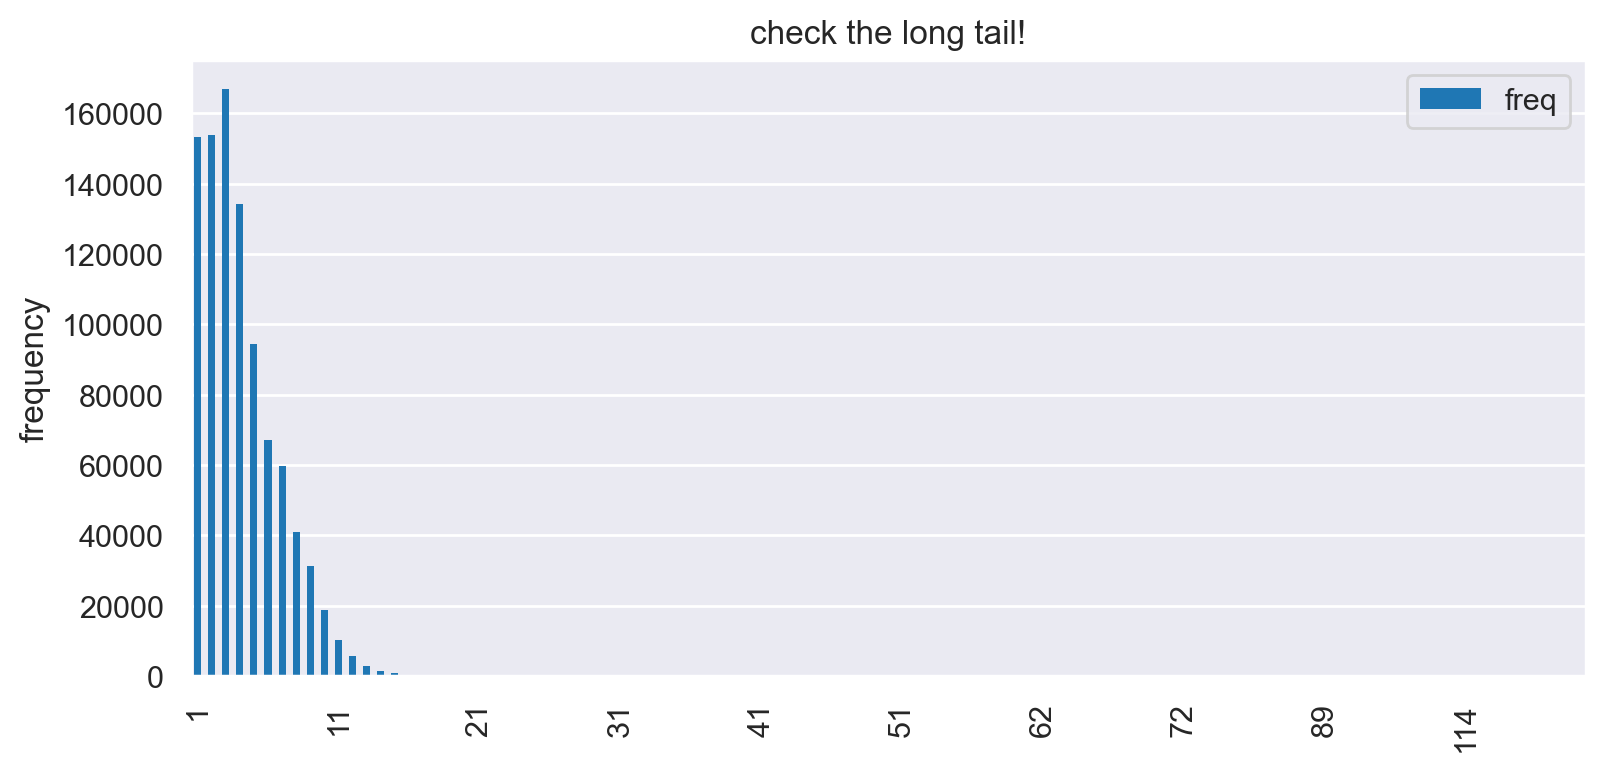

In [240]:
# with plt.style.context("default"):
ax = myth_len_freq_df.plot.bar(
    figsize=(9, 4), title="check the long tail!", linewidth=0,
)
# Print only 1 x-tick-label out of 10
for i, label in enumerate(ax.get_xticklabels()):
    if (i % 10) != 0:
        label.set_visible(False)
plt.ylabel("frequency")
plt.grid(axis="x")
plt.show()

# do not order!

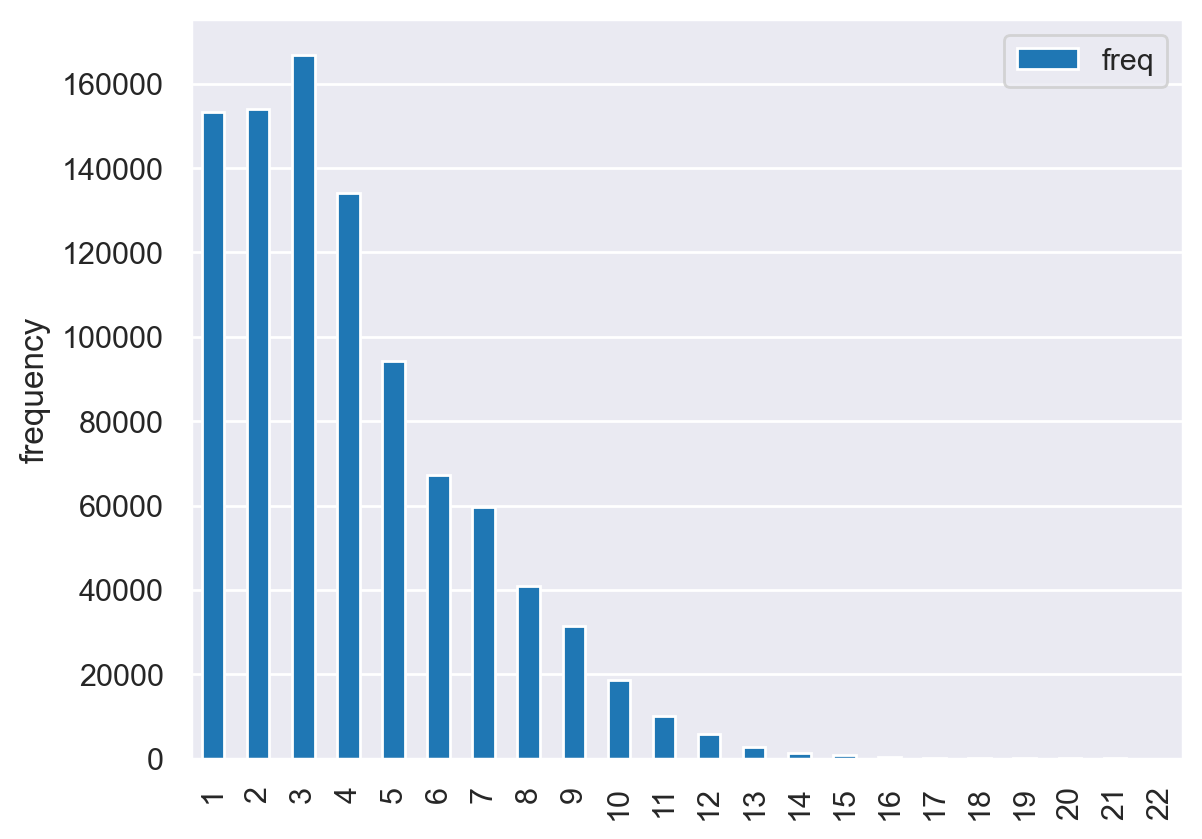

,freq
1,153321
2,153910
3,166899
4,134176
5,94336


In [235]:
myth_len_freq_df.head(22).plot.bar()
plt.ylabel("frequency")
plt.grid(axis="x")
plt.show()

myth_len_freq_df.head(5)

- If you order by token length you get a nice curve, something close to the hypergeometric distribution:

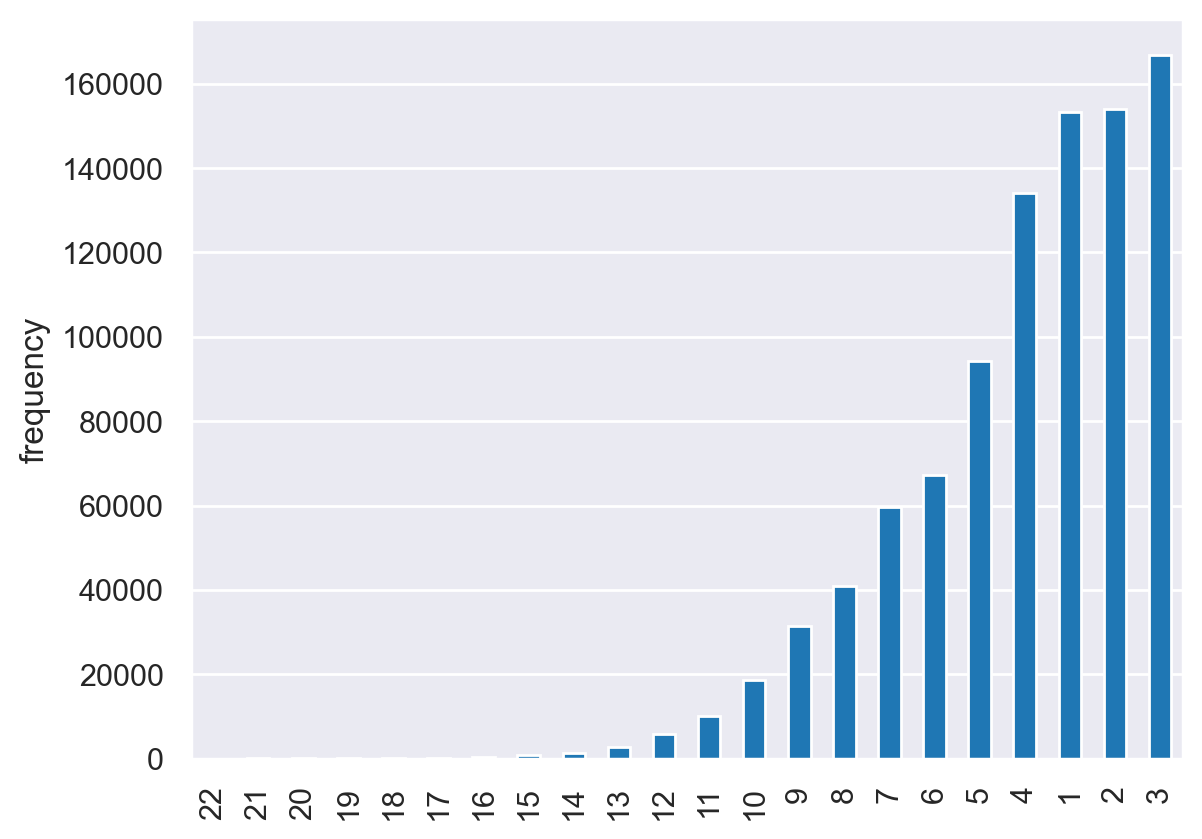

In [257]:
len_freq_df['mythology'].head(22).sort_values().plot.bar()
plt.ylabel("frequency")
plt.grid(axis="x")
plt.show()

# 💥 Let's Zipf token frequencies!

In [263]:
mytho_tok_freq_df

,freq
token,
the,51133
",",51118
.,33184
of,29559
and,21018
...,...
unleash,1
v=nOewVh0umdM,1
Rabbienu,1


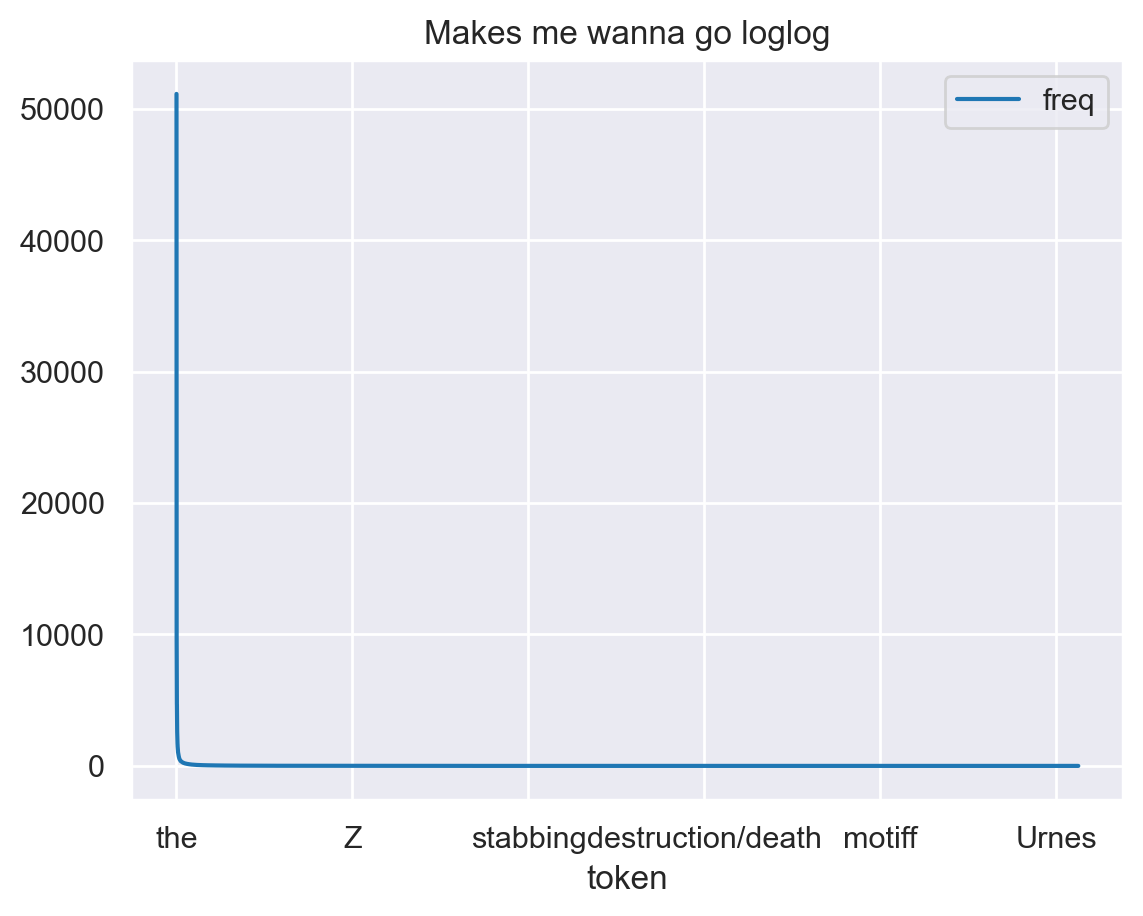

In [258]:
mytho_tok_freq_df.plot(title="Makes me wanna go loglog")
plt.show()

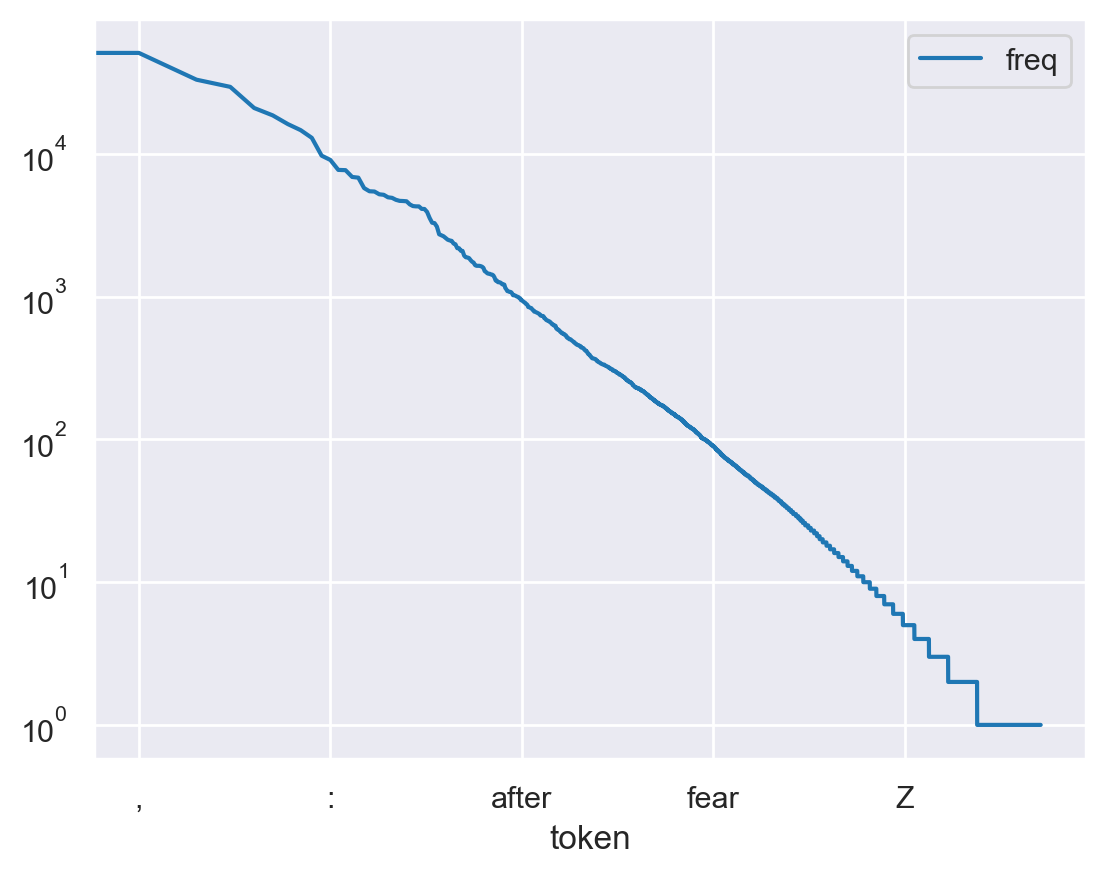

In [260]:
mytho_tok_freq_df.plot(loglog=True)
plt.show()

### Wow! How straight is that!

- Explain why there are: `,: after fear Z?`

<font color=Green>
Because the index of mytho_tok_freq_df is token.
<font>

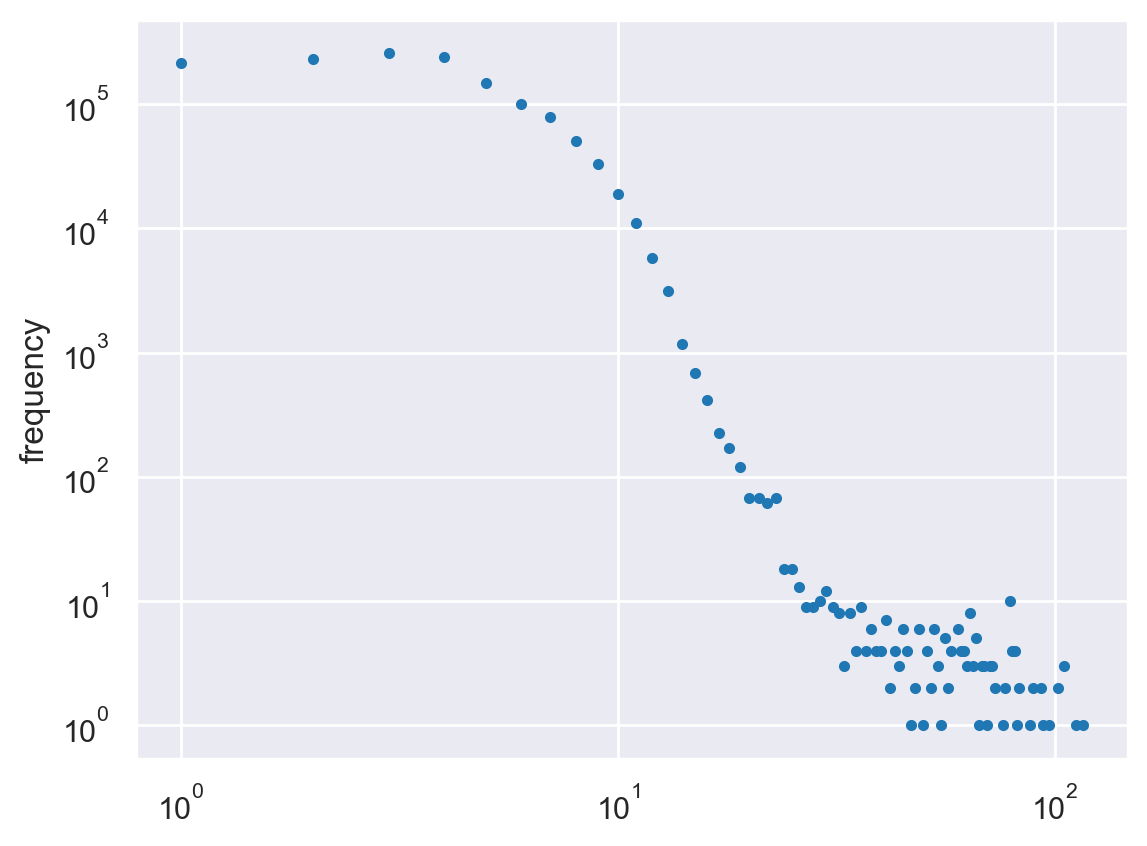

In [262]:
len_freq_df.woodworking.sort_values(ascending=False).plot(loglog=True, style=".")
plt.ylabel("frequency")
plt.show()

#### 🚧 TODO: Now let's process the length distribution for every corpus

In [265]:
all_token_freqs_df = len_freq_df

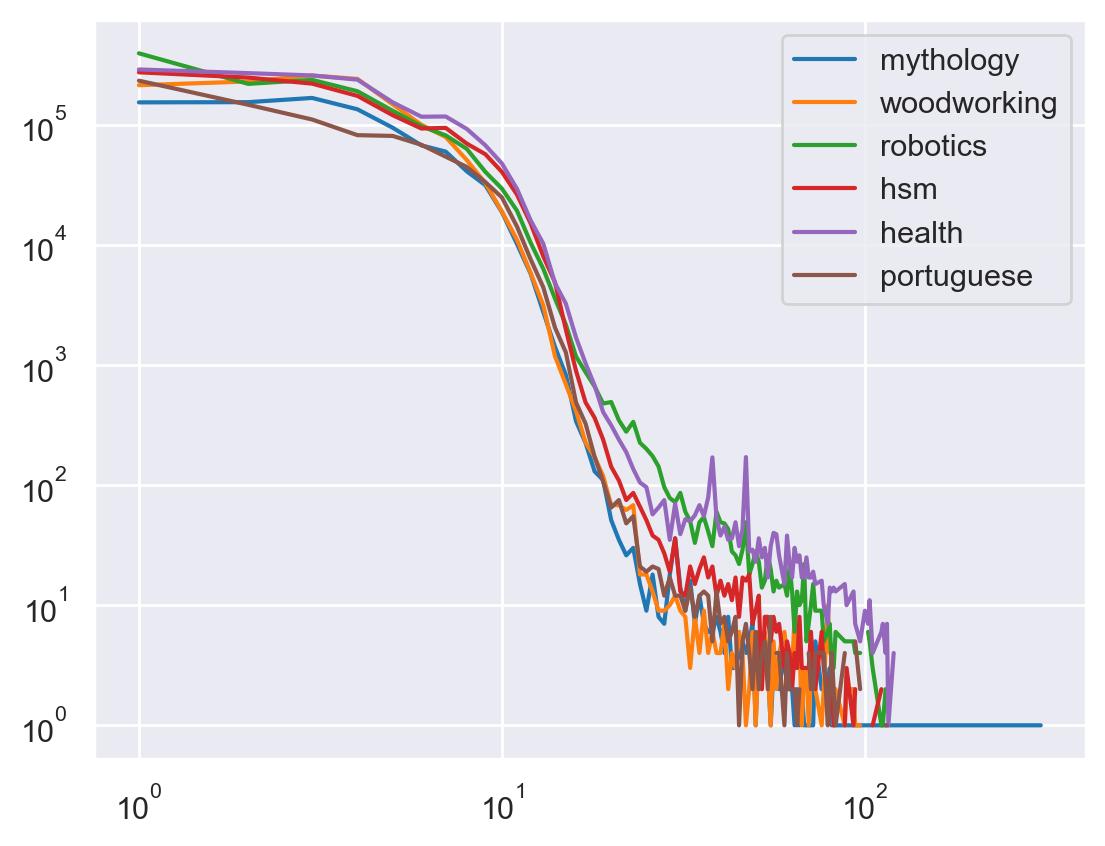

In [266]:
all_token_freqs_df.plot(loglog=True)
plt.show()

#### 🚧 TODO: Do length frequency follow Zipf's law?

Explain the graph results below and possibly fix them

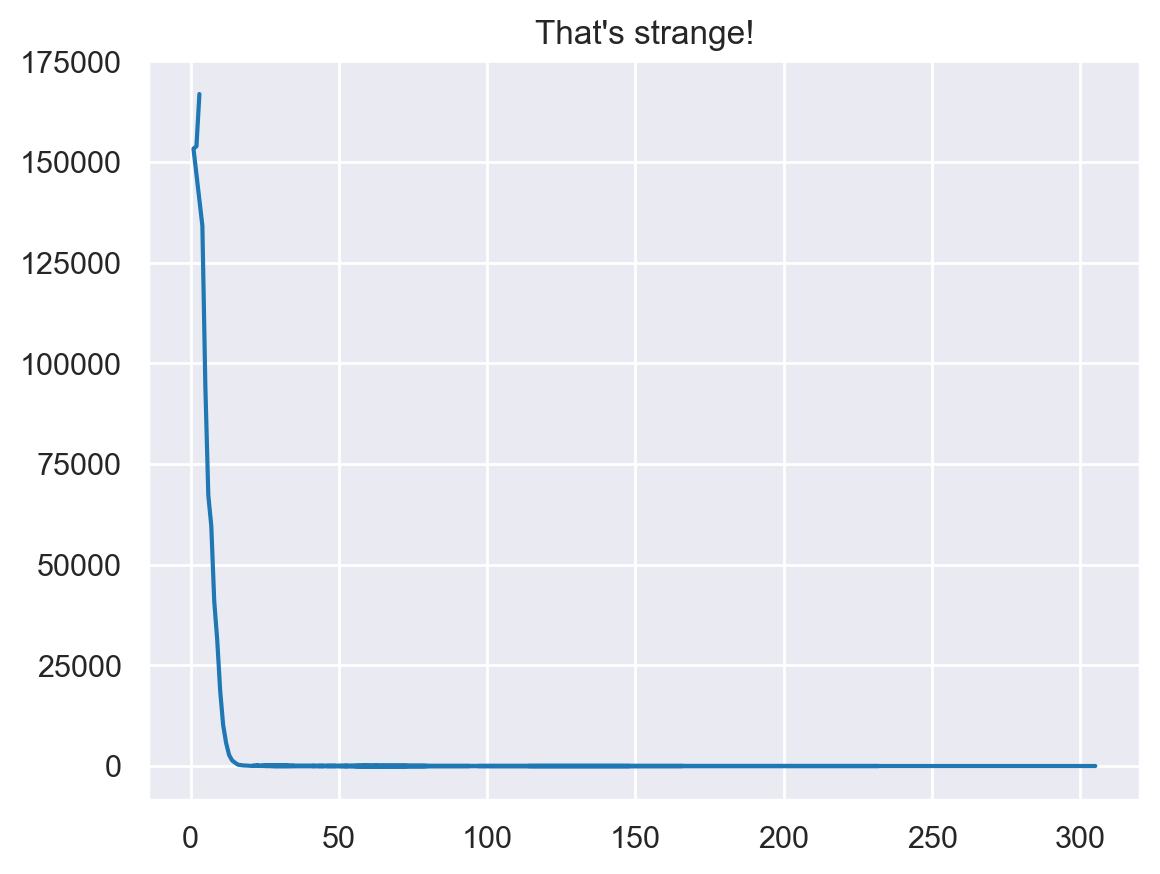

In [267]:
myth_len_freqs = len_freq_df.mythology.sort_values(ascending=False)

myth_len_freqs.plot(title="That's strange!")
plt.show()

<font color=Green>
A little part of tokens(which has short length) have very high frequency while the rest of tokens have low frequency. 
<font>

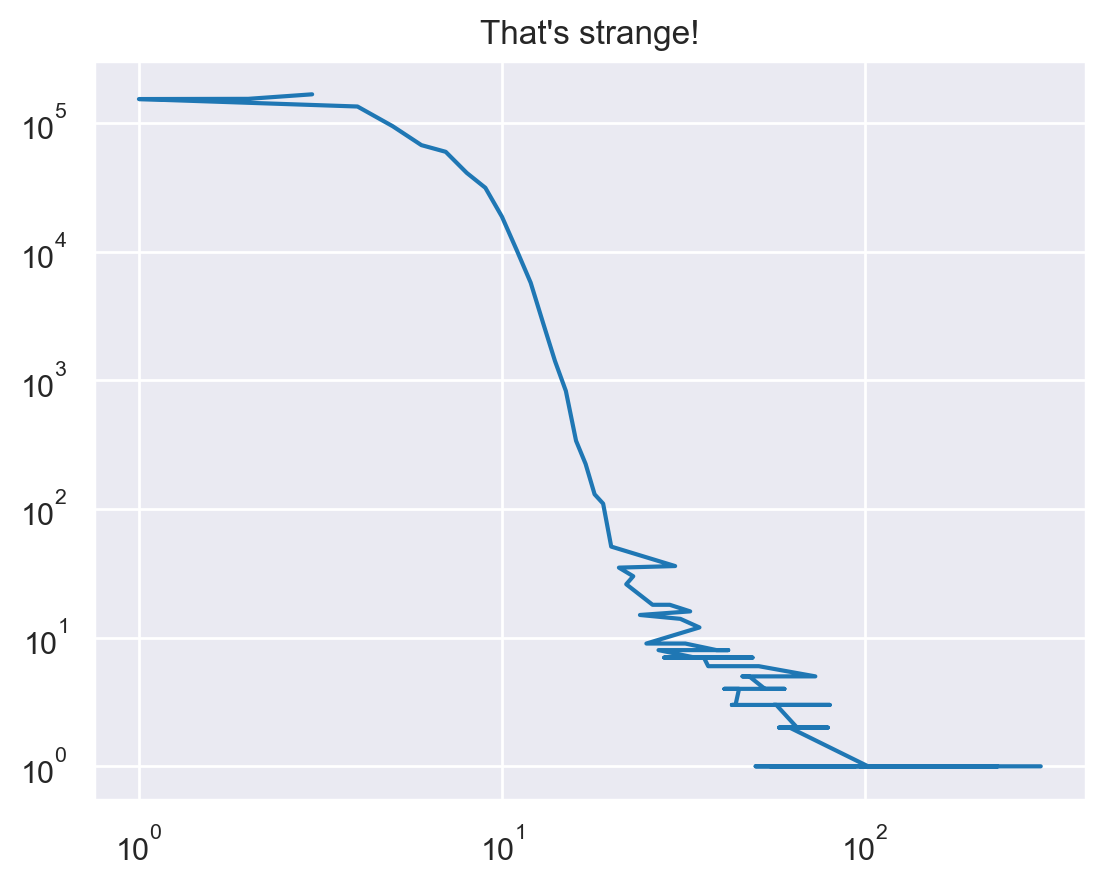

In [270]:
myth_len_freqs.plot(title="That's strange!", loglog=True)
plt.show()

#### 🚧 TODO: How to compute richness in words? How to compute the type/token ratio? Who will win this time?

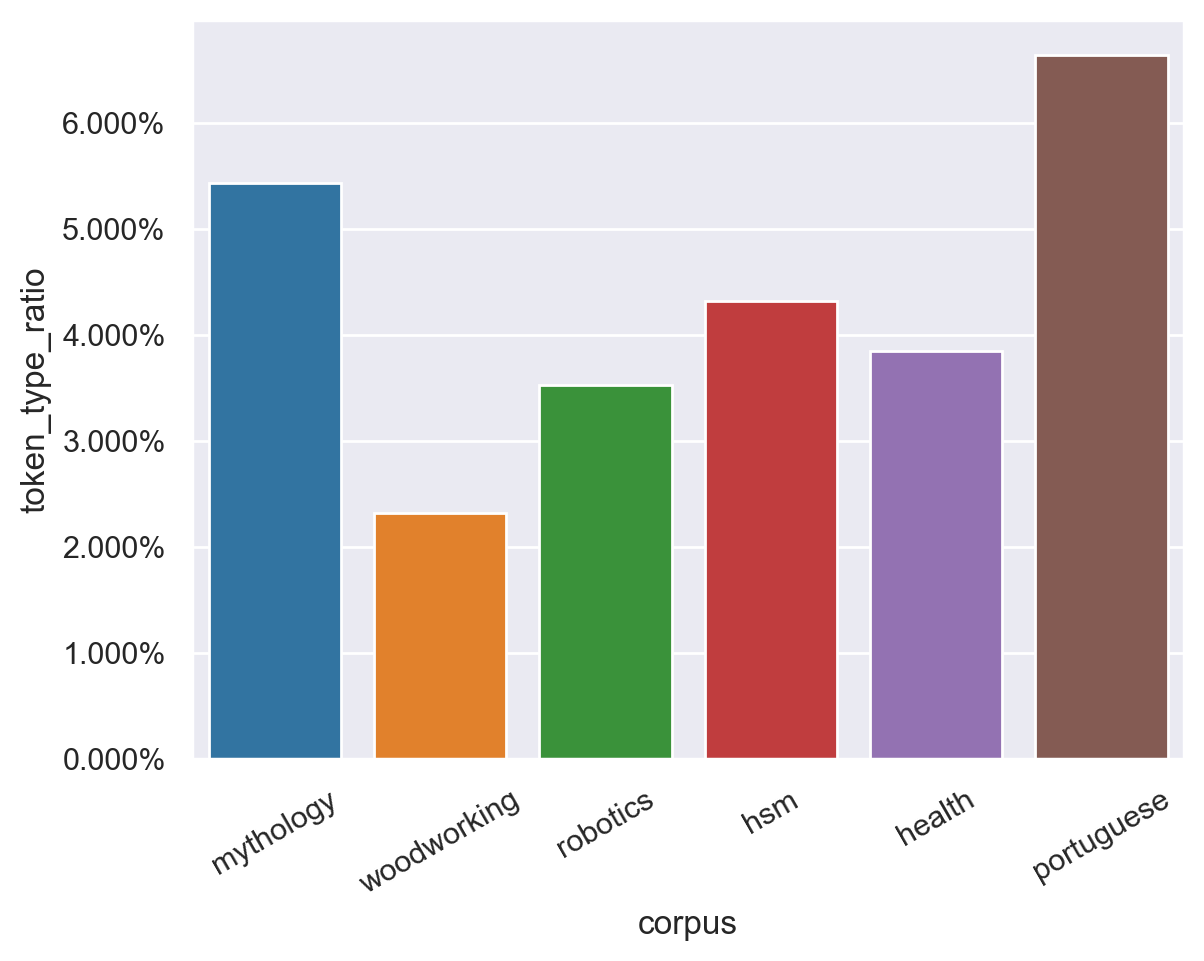

In [281]:
df["token_type_ratio"] = df.nr_types / df.tokens_n
ax = sns.barplot(x=df.index, y="token_type_ratio", data=df)
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1, decimals=3))
plt.xticks(rotation=30)
plt.show()

### What happened to Portuguese? Explain!

Make a type/token ration growth plot. Explain the obtained order!

In [282]:
word_types = df.tokens.progress_map(
    lambda x: batch_counts(x, max_len=df.tokens_n.min(), hop=10_000)
)

  0%|          | 0/6 [00:00<?, ?it/s]

In [284]:
word_types

corpus
mythology      [0, 2534, 4169, 5532, 6859, 8027, 8950, 9777, ...
woodworking    [0, 1985, 3085, 3976, 4727, 5337, 5907, 6419, ...
robotics       [0, 2140, 3200, 4295, 5157, 5693, 6497, 7116, ...
hsm            [0, 2330, 4259, 5560, 6767, 7793, 8760, 9679, ...
health         [0, 2403, 3923, 5236, 6273, 7376, 8312, 9370, ...
portuguese     [0, 2673, 4654, 6238, 7551, 8801, 10153, 11203...
Name: tokens, dtype: object

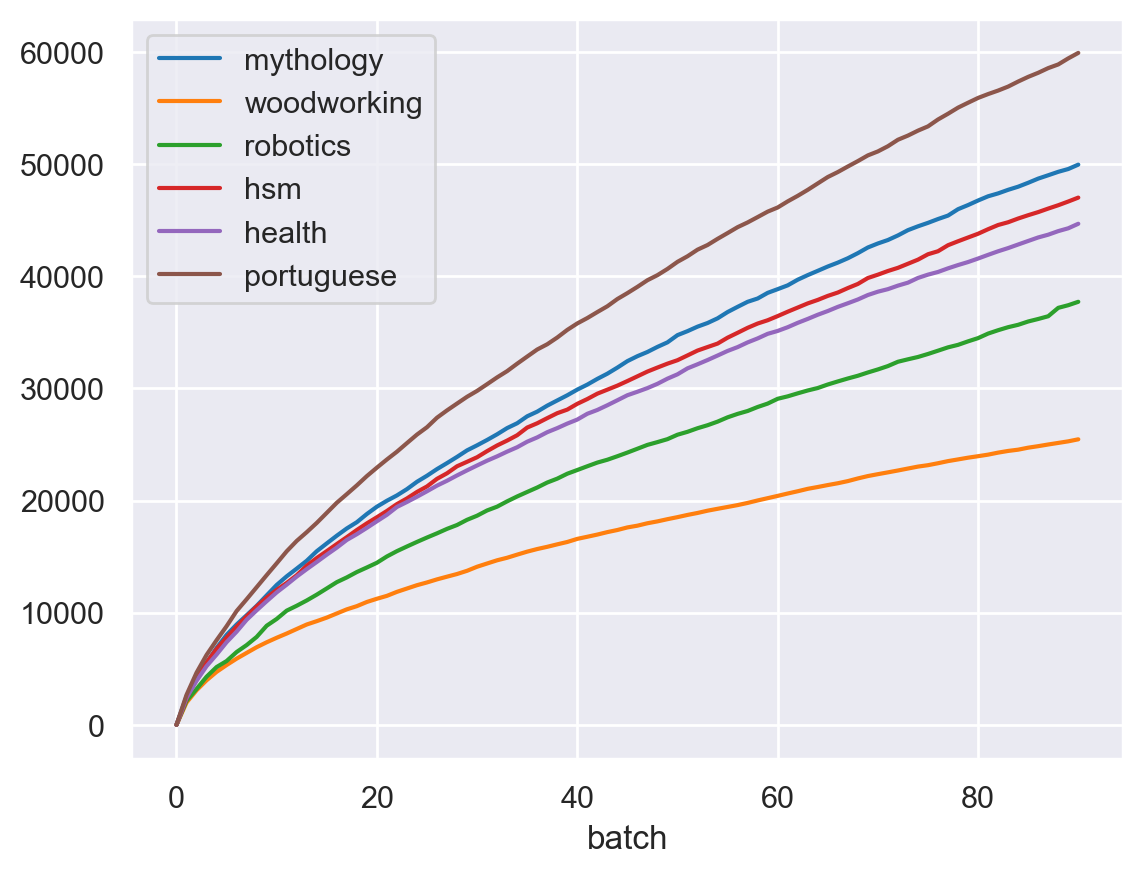

,mythology,woodworking,robotics,hsm,health,portuguese
batch,,,,,,
0,0,0,0,0,0,0
1,2534,1985,2140,2330,2403,2673
2,4169,3085,3200,4259,3923,4654
3,5532,3976,4295,5560,5236,6238
4,6859,4727,5157,6767,6273,7551
...,...,...,...,...,...,...
86,48715,24855,36197,45728,43468,58151
87,49014,25005,36442,46043,43714,58569
88,49320,25145,37190,46341,44032,58895


In [283]:
word_type_df = pd.DataFrame(dict(zip(word_types.index, word_types.values)))
word_type_df.index.name = "batch"
word_type_df.plot()
plt.show()

word_type_df

<font color=Green>
The word types of portuguese increses the most fast while the word types of woodworking is the slowest.
<font>

### Percentage of new words

In [ ]:
# word_type_tokens = {}
# for corpus, text in corpora.items():
#     print(corpus)
# ...

In [ ]:
# ...

# word_type_token_df.plot()
# plt.show()

# word_type_token_df

____